In [2]:
import seaborn as sns

df = sns.load_dataset('titanic')
df.to_csv('titanic.csv', index=False)


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load dataset
df = pd.read_csv('titanic.csv')

In [6]:
# Data Familiarization
print("\n--- Data Preview ---")
print(df.head())


--- Data Preview ---
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [7]:
print("\n--- Data Types ---")
print(df.dtypes)


--- Data Types ---
survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object


In [8]:
print("\n--- Missing Values ---")
print(df.isnull().sum())


--- Missing Values ---
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [9]:
# Initial Exploration
print("\n--- Dataset Shape ---")
print(df.shape)

print("\n--- Descriptive Statistics ---")
print(df.describe(include='all'))



--- Dataset Shape ---
(891, 15)

--- Descriptive Statistics ---
          survived      pclass   sex         age       sibsp       parch  \
count   891.000000  891.000000   891  714.000000  891.000000  891.000000   
unique         NaN         NaN     2         NaN         NaN         NaN   
top            NaN         NaN  male         NaN         NaN         NaN   
freq           NaN         NaN   577         NaN         NaN         NaN   
mean      0.383838    2.308642   NaN   29.699118    0.523008    0.381594   
std       0.486592    0.836071   NaN   14.526497    1.102743    0.806057   
min       0.000000    1.000000   NaN    0.420000    0.000000    0.000000   
25%       0.000000    2.000000   NaN   20.125000    0.000000    0.000000   
50%       0.000000    3.000000   NaN   28.000000    0.000000    0.000000   
75%       1.000000    3.000000   NaN   38.000000    1.000000    0.000000   
max       1.000000    3.000000   NaN   80.000000    8.000000    6.000000   

              fare emb

In [17]:
# Fill missing Age with median
df.fillna(df['age'].median(), inplace=True)


In [20]:
# Fill missing Embarked with mode
df.fillna(df['embarked'].mode()[0], inplace=True)


In [22]:
# Encode Gender
df['sex'] = df['sex'].map({'male': 0, 'female': 1})


In [23]:
# Encode Embarked
embarked_mapping = {label: idx for idx, label in enumerate(df['embarked'].unique())}
df['embarked'] = df['embarked'].map(embarked_mapping)

In [24]:
# Data Analysis
print("\n--- Survival Rate by Gender ---")
print(df.groupby('sex')['survived'].mean())

print("\n--- Survival Rate by Passenger Class ---")
print(df.groupby('pclass')['survived'].mean())



--- Survival Rate by Gender ---
sex
0    0.188908
1    0.742038
Name: survived, dtype: float64

--- Survival Rate by Passenger Class ---
pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64


In [25]:
# Create Age groups
def categorize_age(age):
    if age < 12:
        return 'Child'
    elif age < 60:
        return 'Adult'
    else:
        return 'Senior'

df['AgeGroup'] = df['age'].apply(categorize_age)

print("\n--- Survival Rate by Age Group ---")
print(df.groupby('AgeGroup')['survived'].mean())



--- Survival Rate by Age Group ---
AgeGroup
Adult     0.371393
Child     0.573529
Senior    0.269231
Name: survived, dtype: float64


In [26]:
# Visualization Setup
sns.set(style="whitegrid")

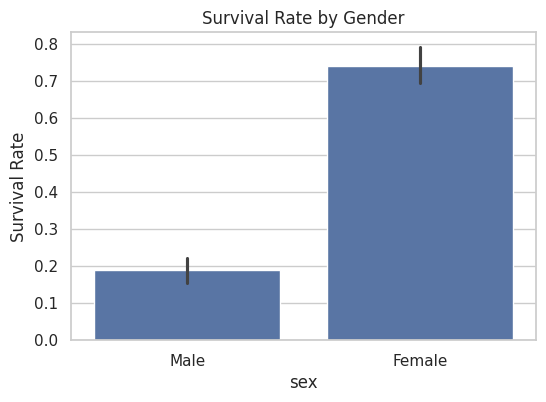

In [28]:
# Survival by Gender
plt.figure(figsize=(6,4))
sns.barplot(x='sex', y='survived', data=df)
plt.title('Survival Rate by Gender')
plt.xticks([0, 1], ['Male', 'Female'])
plt.ylabel('Survival Rate')
plt.show()


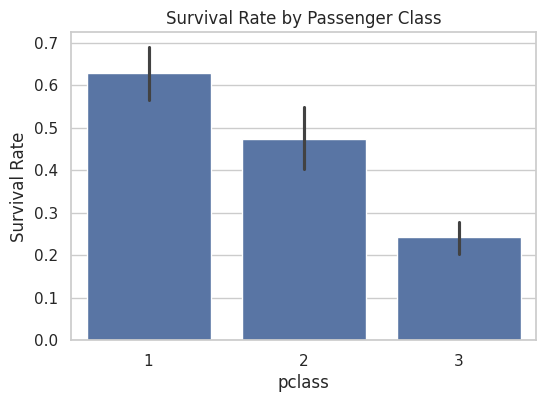

In [30]:
# Survival by Pclass
plt.figure(figsize=(6,4))
sns.barplot(x='pclass', y='survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

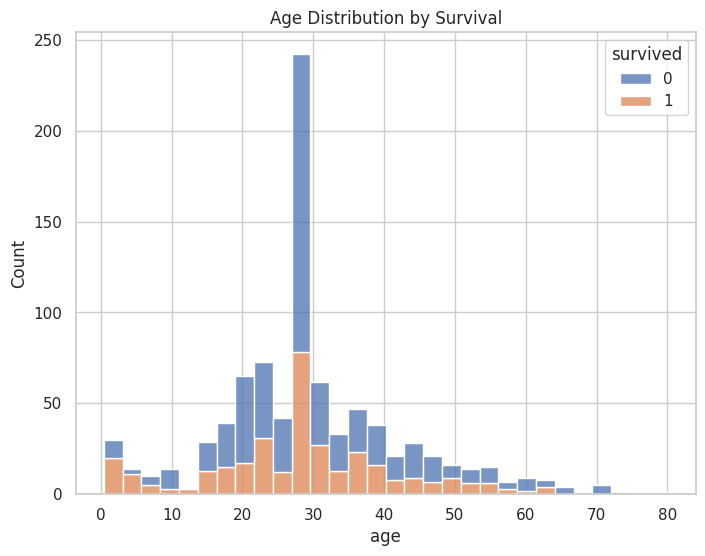

In [31]:
# Age distribution by Survival
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='age', hue='survived', multiple='stack')
plt.title('Age Distribution by Survival')
plt.show()

In [32]:
# Heatmap of correlations
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

ValueError: could not convert string to float: 'Third'

<Figure size 1000x800 with 0 Axes>